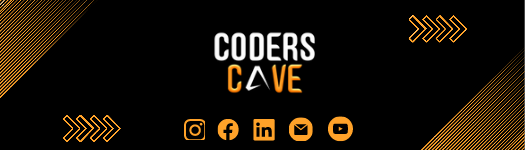

# EDA on Google Playstore Data 

## Name: Mohammad Wasiq

## CodersCave Data Science Internship Project 

In [1]:
# load the require libraries
import pandas as pd
import numpy as np

In [2]:
# read the dataset
df= pd.read_csv("googleplaystore.csv")

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

# Data Cleaning

### Cleaning `Types` column

In [6]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

**Replacing `'0'` from the Type column**

In [7]:
df['Type']= df['Type'].str.replace('0', '1')

In [8]:
df['Type'].unique()

array(['Free', 'Paid', nan, '1'], dtype=object)

**Treating `NULL` value** (dropping beacuse it is only one)

In [9]:
df['Type'].isnull().sum()

1

In [10]:
# replace missing values in the 'Type' column with NaN

df['Type'].fillna(value= np.nan, inplace= True) ## 
df['Type'].isnull().sum()

1

In [11]:
# # select the rows that don't have missing values in the 'Type' column
df= df[df['Type'].notna()]

In [12]:
df['Type'].isnull().sum()

0

**Wow! there is no missing value in this column**

In [13]:
df['Type'].unique()

array(['Free', 'Paid', '1'], dtype=object)

**deleting rows from Type column  where `values = 1`**

In [14]:
# using drop method
newdf = df.drop(df[df['Type'] == '1'].index)
newdf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [15]:
newdf['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [16]:
df['Type'].unique()

array(['Free', 'Paid', '1'], dtype=object)

In [17]:
# create a new DataFrame that excludes the rows where the value in the 'Type' column is equal to 1 using skip value method

newdf = df[df['Type'] != '1']
newdf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [18]:
newdf['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [19]:
newdf['Type'].isnull().sum()

0

**That's Great again there is no missing value in this columns** 

### Cleaning `Price` column 

In [20]:
newdf['Price']= newdf['Price'].str.replace('$', '') 

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\3706580683.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  newdf['Price']= newdf['Price'].str.replace('$', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_10528\3706580683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Price']= newdf['Price'].str.replace('$', '')


In [21]:
newdf['Price'].dtypes

dtype('O')

In [22]:
newdf['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

**Since price is a continous variable but here type of this column is Object therefore we need to clean and convert the data type to float.**

In [23]:
newdf['Price']= newdf['Price'].astype(float)

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\1611444221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Price']= newdf['Price'].astype(float)


In [24]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


**There are some 0 entries that will cause problem later, so increasing all the  values by using `.replace` method.** 

In [25]:
newdf['Price']= newdf['Price'].replace(0.,1.)

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\2540437888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Price']= newdf['Price'].replace(0.,1.)


In [26]:
newdf['Price'].unique()

array([  1.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,
        10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   3.95,
         4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,  17.99,
       400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,   1.59,
         6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,  18.99,
       389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99, 109.99,
       154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,   4.59,
        15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,   2.95,
         2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61, 394.99,
         1.26,   1.2 ,   1.04])

In [27]:
newdf.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Cleaning `Android Ver` column

In [28]:
newdf['Android Ver'].isnull().sum()

2

**There are only two missing values in this column**

In [29]:
newdf['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

**Replacing any other unique value that can  not be identified by pamdas as `"NaN"` to `'NaN'` so that `dropna()` method can  work well.**

In [30]:
newdf['Android Ver']= newdf['Android Ver'].str.replace(' and up', '+')

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\564405402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Android Ver']= newdf['Android Ver'].str.replace(' and up', '+')


In [31]:
newdf['Android Ver'].unique()

array(['4.0.3+', '4.2+', '4.4+', '2.3+', '3.0+', '4.1+', '4.0+', '2.3.3+',
       'Varies with device', '2.2+', '5.0+', '6.0+', '1.6+', '1.5+',
       '2.1+', '7.0+', '5.1+', '4.3+', '4.0.3 - 7.1.1', '2.0+', '3.2+',
       '4.4W+', '7.1+', '7.0 - 7.1.1', '8.0+', '5.0 - 8.0', '3.1+',
       '2.0.1+', '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0+', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [32]:
newdf['Android Ver'].isnull().sum()

2

In [33]:
# Drop the missing values because there ate only 2 missing values
newdf.dropna(subset=['Android Ver'], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\2012941994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(subset=['Android Ver'], inplace=True)


**Now the null values are dropped.**

In [34]:
newdf['Android Ver'].isnull().sum()

0

**Now, there is no missing value in this column.**

In [35]:
newdf['Android Ver'].unique()

array(['4.0.3+', '4.2+', '4.4+', '2.3+', '3.0+', '4.1+', '4.0+', '2.3.3+',
       'Varies with device', '2.2+', '5.0+', '6.0+', '1.6+', '1.5+',
       '2.1+', '7.0+', '5.1+', '4.3+', '4.0.3 - 7.1.1', '2.0+', '3.2+',
       '4.4W+', '7.1+', '7.0 - 7.1.1', '8.0+', '5.0 - 8.0', '3.1+',
       '2.0.1+', '4.1 - 7.1.1', '5.0 - 6.0', '1.0+', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [36]:
newdf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,1.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3+
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,1.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3+
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,1.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3+
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,1.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2+
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,1.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,1.0,Everyone,Education,"July 25, 2017",1.48,4.1+
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,1.0,Everyone,Education,"July 6, 2018",1.0,4.1+
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,1.0,Everyone,Medical,"January 20, 2017",1.0,2.2+
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,1.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [37]:
newdf.isnull().sum().sort_values(ascending=False)

Rating            1473
Current Ver          8
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Android Ver          0
dtype: int64

**There are 1473 missing values in Rating column while rest columns have no missing values.**

## Cleaning `"Current Ver"` column

In [38]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [39]:
df['Current Ver'].isnull().sum()

8

In [40]:
df['Current Ver'].head(20)

0                  1.0.0
1                  2.0.0
2                  1.2.4
3     Varies with device
4                    1.1
5                    1.0
6                    1.1
7               6.1.61.1
8                  2.9.2
9                    2.8
10                 1.0.4
11                1.0.15
12                   3.8
13                 1.0.4
14                 1.2.3
15                   NaN
16                   3.1
17                   1.0
18                 2.2.5
19                 5.5.4
Name: Current Ver, dtype: object

**Since this column has NaN  values and  number of NaN values are very small so we drop these values.**

In [41]:
newdf.dropna(subset=['Current Ver'], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\568350121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(subset=['Current Ver'], inplace=True)


In [42]:
newdf['Current Ver'].isnull().sum()

0

In [43]:
newdf.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [44]:
newdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,1.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3+
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,1.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3+
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,1.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3+
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,1.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2+
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,1.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4+


### Cleaning `Rating` column 
**To cleaning this column is really challenging as compare to others.**

In [45]:
newdf['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10829, dtype: float64

In [46]:
newdf['Rating'].isnull().sum()

1469

**Since data has large number of  null values so we will not drop it instead we will fill it but to fill these value we first have to check the presence of outliers so and if there are outliers present in the data then will fill null values by  `median()` else we will use `mean()` to fill null values.**

<AxesSubplot:>

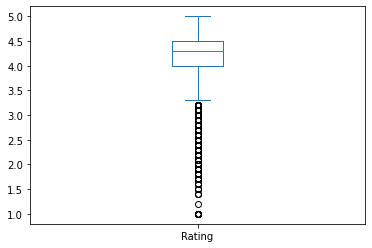

In [47]:
newdf['Rating'].plot(kind='box')

## Outliers Detection

In [48]:
q1= newdf['Rating'].quantile(0.25)
q3= newdf['Rating'].quantile(0.75)

print("First Quartile :", q1)
print("Third Quartile :", q3)

First Quartile : 4.0
Third Quartile : 4.5


In [49]:
# calculating interquartile range
IQR= q3-q1
IQR

0.5

In [50]:
lower_bound= q1-1.5*IQR
upper_bound= q3+1.5*IQR

print("Lower Bound :", lower_bound)
print("Upper Bound :", upper_bound)

Lower Bound : 3.25
Upper Bound : 5.25


**Counting the outliers that are present in the "Rating" column (Lower_bound counting)**

In [51]:
outliers_lower= newdf[newdf['Rating'] < lower_bound]['Rating'].count()
outliers_lower

502

###  counting upper_bound outliers

In [52]:
outliers_upper= newdf[newdf['Rating'] > upper_bound]['Rating'].count()
outliers_upper

0

**Since our data has large number of null values, but the data is about rating so it may not be a better decision to drop the null values because Rating is the opinion featurre of this dataset and manipulating the decision of data will manipulate the decision generated by model. So here we use to fill the missing  values by `Meadian()` beacuse median is not succeptible by  outliers.**

In [53]:
newdf['Rating'].median()

4.3

In [54]:
newdf['Rating'].mean()

4.191837606837606

### Filling the null values by  using ` fillna()`

In [55]:
newdf['Rating'].fillna(newdf['Rating'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\1613896572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Rating'].fillna(newdf['Rating'].median(), inplace=True)


In [56]:
newdf['Rating'].isnull().sum()

0

<AxesSubplot:>

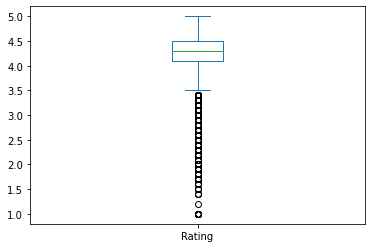

In [57]:
newdf['Rating'].plot(kind= 'box')

In [58]:
newdf.isnull().sum().sort_values(ascending=False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**That's great there is no missing value in our dataset.**

In [59]:
newdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,1.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3+
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,1.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3+
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,1.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3+
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,1.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2+
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,1.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4+


In [60]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


**Since `"Size"` and `"Installs"` features sholud be numeric so we are now converting them.** 

### Cleaning `"Size"` feature

In [61]:
newdf['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10829, dtype: object

In [62]:
newdf['Size'].dtypes

dtype('O')

**Size column has `M` and `K` as size which is not good for computation, changing `"M"` to `"KB"` by multiplying `1000`. This will give us size which is in `M` to `M x 1000` and size `"KB"` will remain to `KB`

In [63]:
newdf['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [64]:
newdf['Size'] = newdf['Size'].str.replace('k', '')

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\1631861350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Size'] = newdf['Size'].str.replace('k', '')


In [65]:
newdf['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M', '23',
       '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M',
       '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M',
       '61M', '66M', '79', '8.4M', '118', '44M', '695', '1.6M', '6.2M',
  

In [66]:
newdf['Size'] = newdf['Size'].str.replace('M', '')

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\3111713016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Size'] = newdf['Size'].str.replace('M', '')


In [67]:
newdf['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

### Cleaning `"Installs"` feature

In [68]:
newdf['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10829, dtype: object

In [69]:
newdf['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [70]:
newdf['Installs'] = newdf['Installs'].str.replace('+', '')

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\3927638990.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  newdf['Installs'] = newdf['Installs'].str.replace('+', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_10528\3927638990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Installs'] = newdf['Installs'].str.replace('+', '')


In [71]:
newdf['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

**Since `","` is also a non int character so we have to remove it to change the type float**

In [72]:
newdf['Installs'] = newdf['Installs'].str.replace(',', '')

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\630467616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Installs'] = newdf['Installs'].str.replace(',', '')


In [73]:
newdf['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [74]:
newdf['Installs'] = pd.to_numeric(newdf['Installs'], downcast='integer')

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\67477851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Installs'] = pd.to_numeric(newdf['Installs'], downcast='integer')


In [75]:
newdf['Installs'].dtype

dtype('int32')

In [76]:
newdf['Installs'].head(20)

0        10000
1       500000
2      5000000
3     50000000
4       100000
5        50000
6        50000
7      1000000
8      1000000
9        10000
10     1000000
11     1000000
12    10000000
13      100000
14      100000
16      500000
17       10000
18     5000000
19    10000000
20      100000
Name: Installs, dtype: int32

In [77]:
newdf['Installs']= newdf['Installs'].astype(float)

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\3431034454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Installs']= newdf['Installs'].astype(float)


In [78]:
newdf.head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000.0,Free,1.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3+
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000.0,Free,1.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3+
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,1.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3+
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,1.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2+
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,1.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4+
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,1.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3+
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000.0,Free,1.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3+


In [79]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  float64
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


## Feature Engineering
**Since data has some features that are not that much relevant to and if taken to model training, will cause many disturbances. So dropping the features will make our task easy.**


**Since data has some features that are not that much relevant to and if taken to model training, will cause many disturbances. So dropping the features will make our task easy**

### Dropping `"Last Updated"` 
**feature because it is object  type, it should be of date time type because it stores last update date of the app.**

**This feature will not have much correlation with other feature. So instead of entertaining this feature we simply drop this feature.**

In [80]:
newdf.drop('Last Updated', axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\1354307761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop('Last Updated', axis=1, inplace=True)


In [81]:
newdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000.0,Free,1.0,Everyone,Art & Design,1.0.0,4.0.3+
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000.0,Free,1.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3+
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,1.0,Everyone,Art & Design,1.2.4,4.0.3+
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,1.0,Teen,Art & Design,Varies with device,4.2+
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,1.0,Everyone,Art & Design;Creativity,1.1,4.4+


### Dropping "Current Ver" feature
**Because it is not that much relevantt to our data and will cause errors later while training the model.**

In [82]:
newdf.drop('Current Ver', axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\915521872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop('Current Ver', axis=1, inplace=True)


In [83]:
newdf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000.0,Free,1.0,Everyone,Art & Design,4.0.3+
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000.0,Free,1.0,Everyone,Art & Design;Pretend Play,4.0.3+
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,1.0,Everyone,Art & Design,4.0.3+
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,1.0,Teen,Art & Design,4.2+
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,1.0,Everyone,Art & Design;Creativity,4.4+
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000.0,Free,1.0,Everyone,Education,4.1+
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,1.0,Everyone,Education,4.1+
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000.0,Free,1.0,Everyone,Medical,2.2+
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,1.0,Mature 17+,Books & Reference,Varies with device


### Dropping `"Android Ver"` feature

In [84]:
newdf.drop('Android Ver', axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10528\3165205486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop('Android Ver', axis=1, inplace=True)


In [85]:
newdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000.0,Free,1.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000.0,Free,1.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,1.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,1.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,1.0,Everyone,Art & Design;Creativity


## Drawing insights by Category
**Here we can see that "FAMILY" is the category that has maximum number of apps listed. Followed by "GAME" and "TOOLS" and "BEAUTY" is the category that has minimum number of apps listed on google playstore.**

In [86]:
Number_of_apps_category_wise =newdf.groupby(['Category'])['Category'].count().sort_values(ascending=False)
Number_of_apps_category_wise

Category
FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

### Number of install category wise
    Here we are trying to find the number of installs each category has so that we can conclude something

In [87]:
number_of_installs_category_wise= newdf.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
number_of_installs_category_wise

Category
GAME                   3.508602e+10
COMMUNICATION          3.264728e+10
PRODUCTIVITY           1.417609e+10
SOCIAL                 1.406987e+10
TOOLS                  1.145227e+10
FAMILY                 1.025820e+10
PHOTOGRAPHY            1.008825e+10
NEWS_AND_MAGAZINES     7.496318e+09
TRAVEL_AND_LOCAL       6.868887e+09
VIDEO_PLAYERS          6.222003e+09
SHOPPING               3.247849e+09
ENTERTAINMENT          2.869160e+09
PERSONALIZATION        2.325484e+09
BOOKS_AND_REFERENCE    1.921469e+09
SPORTS                 1.751174e+09
HEALTH_AND_FITNESS     1.583073e+09
BUSINESS               1.001915e+09
FINANCE                8.766487e+08
EDUCATION              8.714520e+08
MAPS_AND_NAVIGATION    7.242819e+08
LIFESTYLE              5.376435e+08
WEATHER                4.261005e+08
FOOD_AND_DRINK         2.738988e+08
DATING                 2.643108e+08
HOUSE_AND_HOME         1.687125e+08
ART_AND_DESIGN         1.243331e+08
LIBRARIES_AND_DEMO     6.199591e+07
COMICS             

#### total number of categories

In [88]:
number_of_installs_category_wise.count()

33

#### Minimum number of Installs 

In [89]:
number_of_installs_category_wise.min()

15973161.0

#### Maximum number of installs

In [90]:
number_of_installs_category_wise.max()

35086024415.0

# **Visualization of data by `Plots` and `Graphs`***

### Visualizing number of Installs category wise

In [91]:
Number_of_apps_category_wise.head()

Category
FAMILY      1968
GAME        1144
TOOLS        841
MEDICAL      463
BUSINESS     460
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category'>

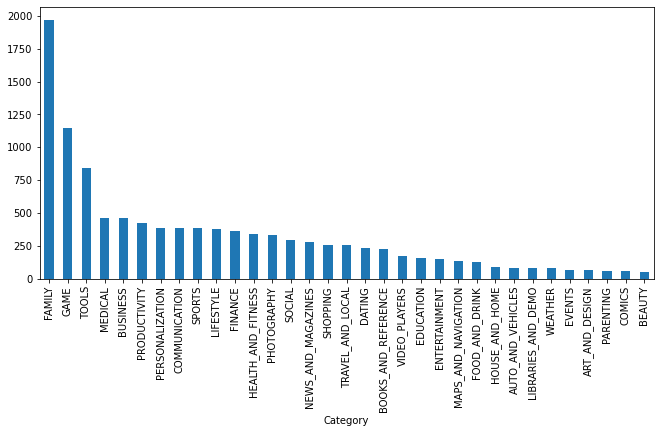

In [92]:
Number_of_apps_category_wise.plot(kind='bar', figsize=(11,5))

**From the above bar chart we can easily see that `family` types apps are most stored app on google playstore and then `Game`**.

**`Beauty` apps are least stored app on google playstore**

<AxesSubplot:ylabel='Category'>

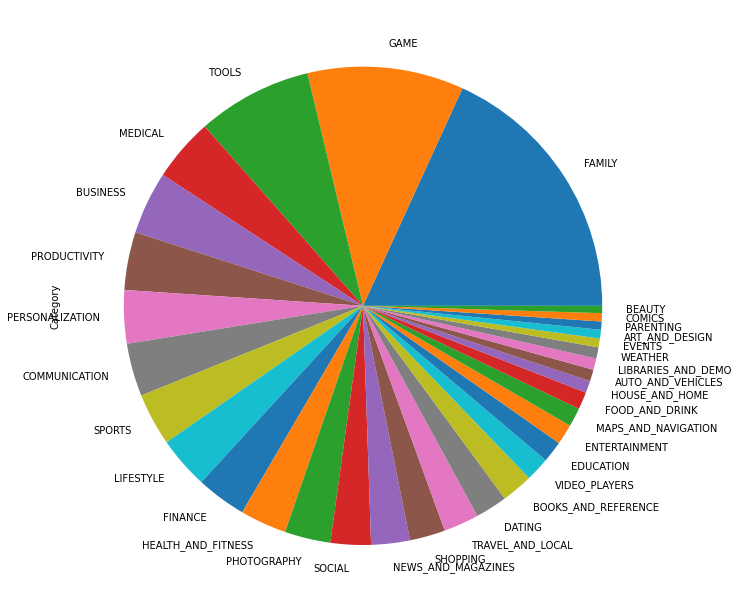

In [93]:
Number_of_apps_category_wise.plot(kind= 'pie', figsize=(11,11))

**From the above pie chart we can easily see that `family` types apps are most installed on google playstore and then `Game`**.

**`Beauty` apps are least installed on google playstore**

<AxesSubplot:xlabel='Category'>

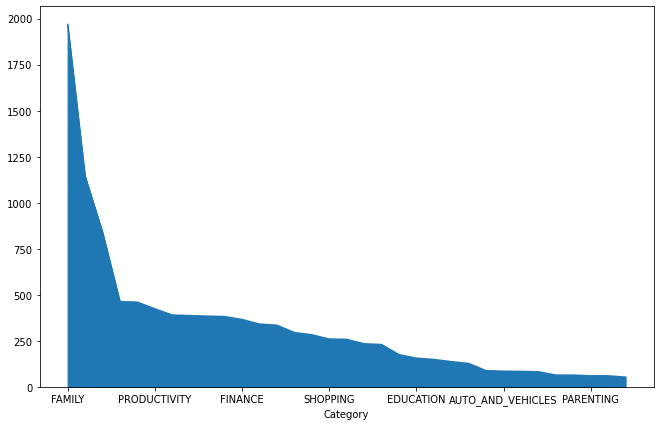

In [94]:
Number_of_apps_category_wise.plot(kind= 'area', figsize=(11,7))

### Visualizing category wise 

In [95]:
number_of_installs_category_wise

Category
GAME                   3.508602e+10
COMMUNICATION          3.264728e+10
PRODUCTIVITY           1.417609e+10
SOCIAL                 1.406987e+10
TOOLS                  1.145227e+10
FAMILY                 1.025820e+10
PHOTOGRAPHY            1.008825e+10
NEWS_AND_MAGAZINES     7.496318e+09
TRAVEL_AND_LOCAL       6.868887e+09
VIDEO_PLAYERS          6.222003e+09
SHOPPING               3.247849e+09
ENTERTAINMENT          2.869160e+09
PERSONALIZATION        2.325484e+09
BOOKS_AND_REFERENCE    1.921469e+09
SPORTS                 1.751174e+09
HEALTH_AND_FITNESS     1.583073e+09
BUSINESS               1.001915e+09
FINANCE                8.766487e+08
EDUCATION              8.714520e+08
MAPS_AND_NAVIGATION    7.242819e+08
LIFESTYLE              5.376435e+08
WEATHER                4.261005e+08
FOOD_AND_DRINK         2.738988e+08
DATING                 2.643108e+08
HOUSE_AND_HOME         1.687125e+08
ART_AND_DESIGN         1.243331e+08
LIBRARIES_AND_DEMO     6.199591e+07
COMICS             

<AxesSubplot:xlabel='Category'>

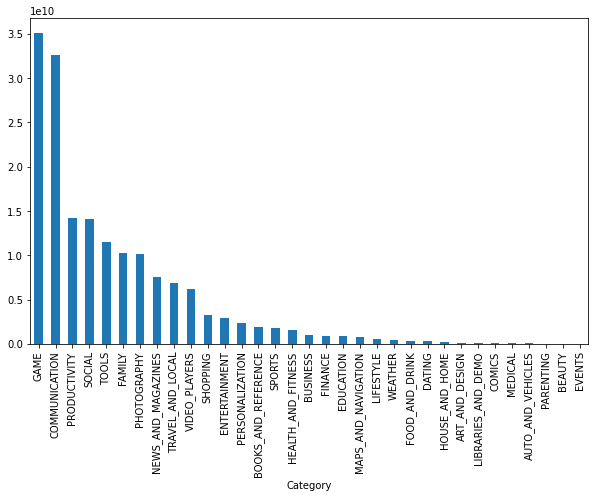

In [96]:
number_of_installs_category_wise.plot(kind='bar', figsize=(10,6))

**From the above bar chart we can easily see that `Game` types apps are most installed on google playstore and then `Communication`**.

** `Events` and `Beauty` apps are least installed on google playstore**

<AxesSubplot:xlabel='Category'>

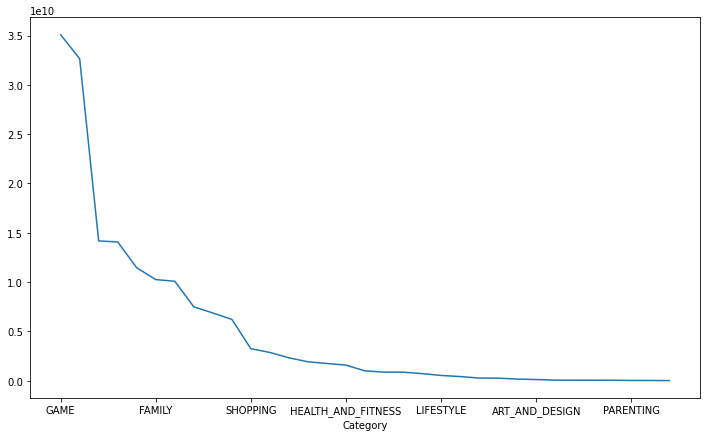

In [97]:
number_of_installs_category_wise.plot(kind= 'line', figsize=(12,7))